In [2]:
pip install captum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [34]:
import torch
from torch import nn
import numpy as np
import captum
from captum.attr import IntegratedGradients
from torchvision.models.detection import fasterrcnn_resnet50_fpn
import torchvision


In [4]:
torch.manual_seed(123)
np.random.seed(123)

In [25]:
# prompt: load faster rcnn model from state dict


model_path = '/content/drive/MyDrive/arm-unicef/models'

frcnn = fasterrcnn_resnet50_fpn(weights=None,
                                weights_backbone=None,
                                num_classes= 4,
                                max_size = 1000,
                                min_size= 500,
                                skip_resize = True,
                                  #  trainable_backbone_layers=1,
                                rpn_pre_nms_top_n_train=1000,
                                  #  rpn_pre_nms_top_n_test=50,
                                rpn_post_nms_top_n_train=500,
                                rpn_post_nms_top_n_test=50,)

# Load the state dictionary from a file
state_dict = torch.load(f'{model_path}/trained_model.pth')

# Update the model's state dictionary with the loaded one
frcnn.load_state_dict(state_dict)

<All keys matched successfully>

In [32]:
backbone = torchvision.models.resnet50(weights=torchvision.models.ResNet50_Weights.IMAGENET1K_V2)
backbone.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [35]:
num_features = backbone.fc.in_features

backbone.fc = nn.Linear(num_features, 4)
backbone.fc

Linear(in_features=2048, out_features=4, bias=True)

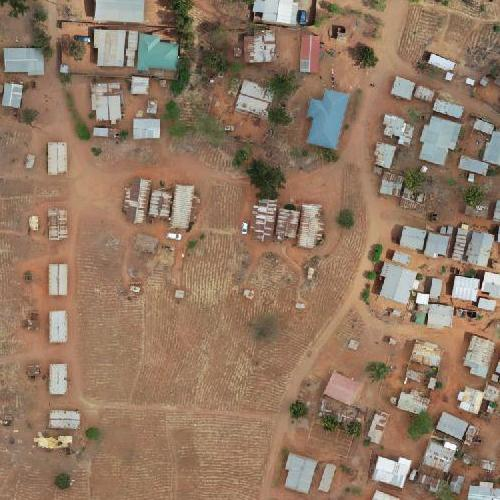

In [18]:
from torchvision.io.image import read_image
from torchvision.transforms.functional import to_pil_image
from torchvision.transforms import v2
import random
import glob

drive_dir = '/content/drive/MyDrive/arm-unicef'

train_images = glob.glob(f'{drive_dir}/train/*.jpeg')

random_image = random.sample(train_images, 1)

input = read_image(f"{random_image[0]}")

baseline = torch.zeros_like(input)

to_pil_image(input)

In [36]:
backbone.eval()
ig = IntegratedGradients(backbone)

attribution, delta = ig.attribute(input,
                                  baseline,
                                  # target=0,
                                  return_convergence_delta=True)

RuntimeError: Given groups=1, weight of size [64, 3, 7, 7], expected input[1, 150, 500, 500] to have 3 channels, but got 150 channels instead

In [22]:
!python -m captum.insights.example

Traceback (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 187, in _run_module_as_main
    mod_name, mod_spec, code = _get_module_details(mod_name, _Error)
  File "/usr/lib/python3.10/runpy.py", line 110, in _get_module_details
    __import__(pkg_name)
  File "/usr/local/lib/python3.10/dist-packages/captum/insights/__init__.py", line 1, in <module>
    from captum.insights.attr_vis import AttributionVisualizer, Batch, features  # noqa
  File "/usr/local/lib/python3.10/dist-packages/captum/insights/attr_vis/__init__.py", line 1, in <module>
    from captum.insights.attr_vis.app import AttributionVisualizer, Batch  # noqa
  File "/usr/local/lib/python3.10/dist-packages/captum/insights/attr_vis/app.py", line 28, in <module>
    from captum.insights.attr_vis.server import namedtuple_to_dict
  File "/usr/local/lib/python3.10/dist-packages/captum/insights/attr_vis/server.py", line 11, in <module>
    from flask_compress import Compress
ModuleNotFoundError: No module named